<a href="https://colab.research.google.com/github/ChristopherCrepin/Colaboratory/blob/main/GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import folium
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
GPS = folium.Map(location=[48.856614, 2.3522219], zoom_start=4)
display(GPS)

In [18]:
A=folium.Marker([48.856614, 2.3522219], popup="Paris")
A.add_to(GPS)

B=folium.Marker([50.6333, 3.0667], popup="Lille").add_to(GPS)
B.add_to(GPS)

C=folium.Marker([43.3, 5.4], popup="Marseille").add_to(GPS)
C.add_to(GPS)

D=folium.Marker([43.6044622, 1.4442469], popup="Toulouse").add_to(GPS)
D.add_to(GPS)

E=folium.Marker([44.841225, -0.5800364], popup="Bordeaux").add_to(GPS)
E.add_to(GPS)

F=folium.Marker([48.1113387, -1.6800198], popup="Rennes").add_to(GPS)
F.add_to(GPS)

display(GPS)

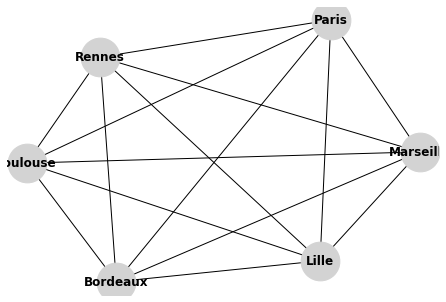

In [43]:
G = nx.Graph()
G.add_node('Paris')
G.add_node('Lille')
G.add_node('Marseille')
G.add_node('Toulouse')
G.add_node('Bordeaux')
G.add_node('Rennes')
G.add_edge('Paris','Lille',weight=225.3)
G.add_edge('Paris','Marseille',weight=776.4)
G.add_edge('Paris','Toulouse',weight=678.0)
G.add_edge('Paris','Bordeaux',weight=584.2)
G.add_edge('Paris','Rennes',weight=354.7)
G.add_edge('Lille','Marseille',weight=1002.6)
G.add_edge('Lille','Rennes',weight=571.3)
G.add_edge('Lille','Bordeaux',weight=800)
G.add_edge('Lille','Toulouse',weight=893.8)
G.add_edge('Marseille','Bordeaux',weight=645.4)
G.add_edge('Marseille','Toulouse',weight=403.7)
G.add_edge('Marseille','Rennes',weight=1051.9)
G.add_edge('Toulouse','Bordeaux',weight=244.9)
G.add_edge('Toulouse','Rennes',weight=704.3)
G.add_edge('Rennes','Bordeaux',weight=467.5)
nx.draw(G, with_labels=True, font_weight='bold', node_size=1500, node_color='lightgrey')